In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import xarray as xr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

warnings.filterwarnings("ignore",message='invalid value encountered in less_equal')

%matplotlib inline

In [2]:
savePath = '/Users/danstechman/GoogleDrive/School/Research/PECAN/Microphysics/plots/vertical_profiles'
fType = 'pdf'

noDispSave = False

plotSepSprls = True
plotZoneCmp  = False

plotRH   = False
plotNt   = False
plotTWC  = False
plotDmm  = False
plotARat = False
plotARatRH = True
plotRE   = False
plotRjcR = False

# Define temp bin interval
binIntvl = 1.0


# flights = ['20150617','20150620','20150701','20150702','20150706','20150709']
flights = ['20150620']

tzFill = 'darkkhaki'
tzLine = '#5F5B36'
esrFill = 'mediumslateblue'
esrLine = '#3D3477'
arFill = 'darkcyan'
arLine = '#005757'

In [3]:
tempLim = (22,-18.5)
rhLim   = (0,120)
NtLim   = (1e-6,1)
twcLim  = (1e-5,10)
DmmLim  = (0,5) #** Outliers (otherwise upper-end can be ~2.5)
ARatLim = (0.2,0.85)
reLim   = (0.01,0.19) #** Outliers (otherwise upper-end can be 0.12)
RjcrLim = (0,1)

Working on 20150620...
	Analyzing Spiral 1
	Analyzing Spiral 2
	Analyzing Spiral 3
	Analyzing Spiral 4
	Analyzing Spiral 5
	Analyzing Spiral 6
	Analyzing Spiral 7


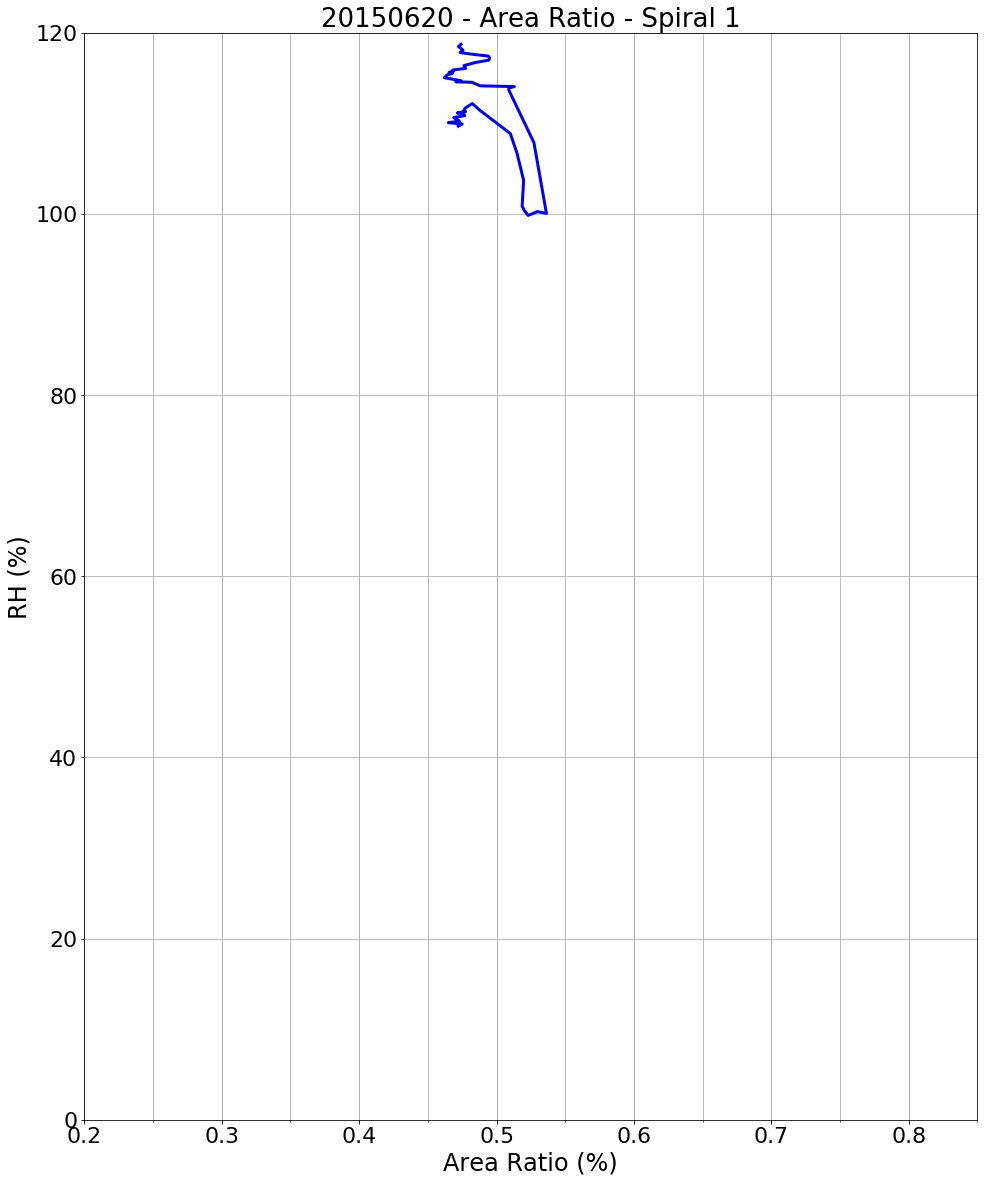

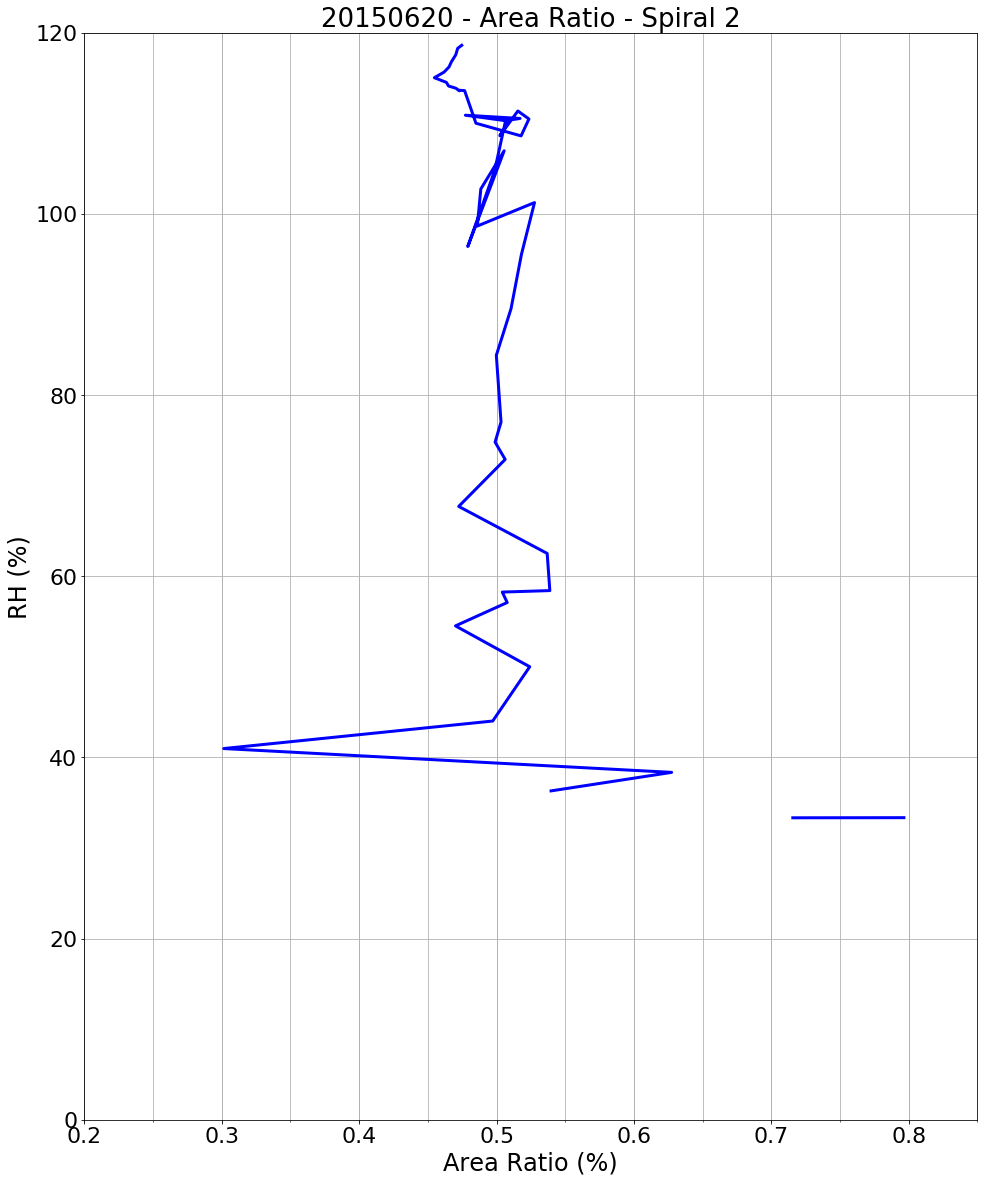

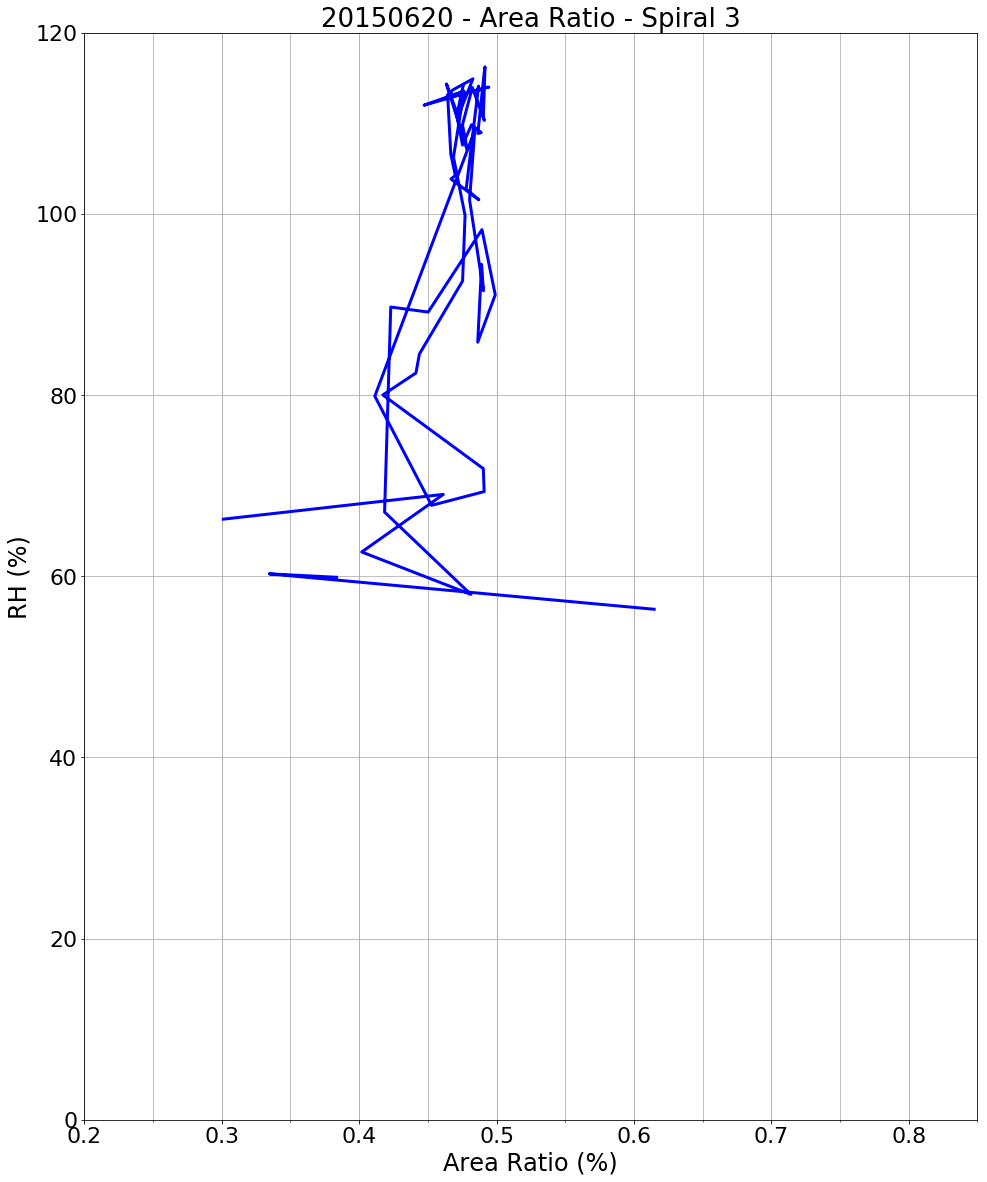

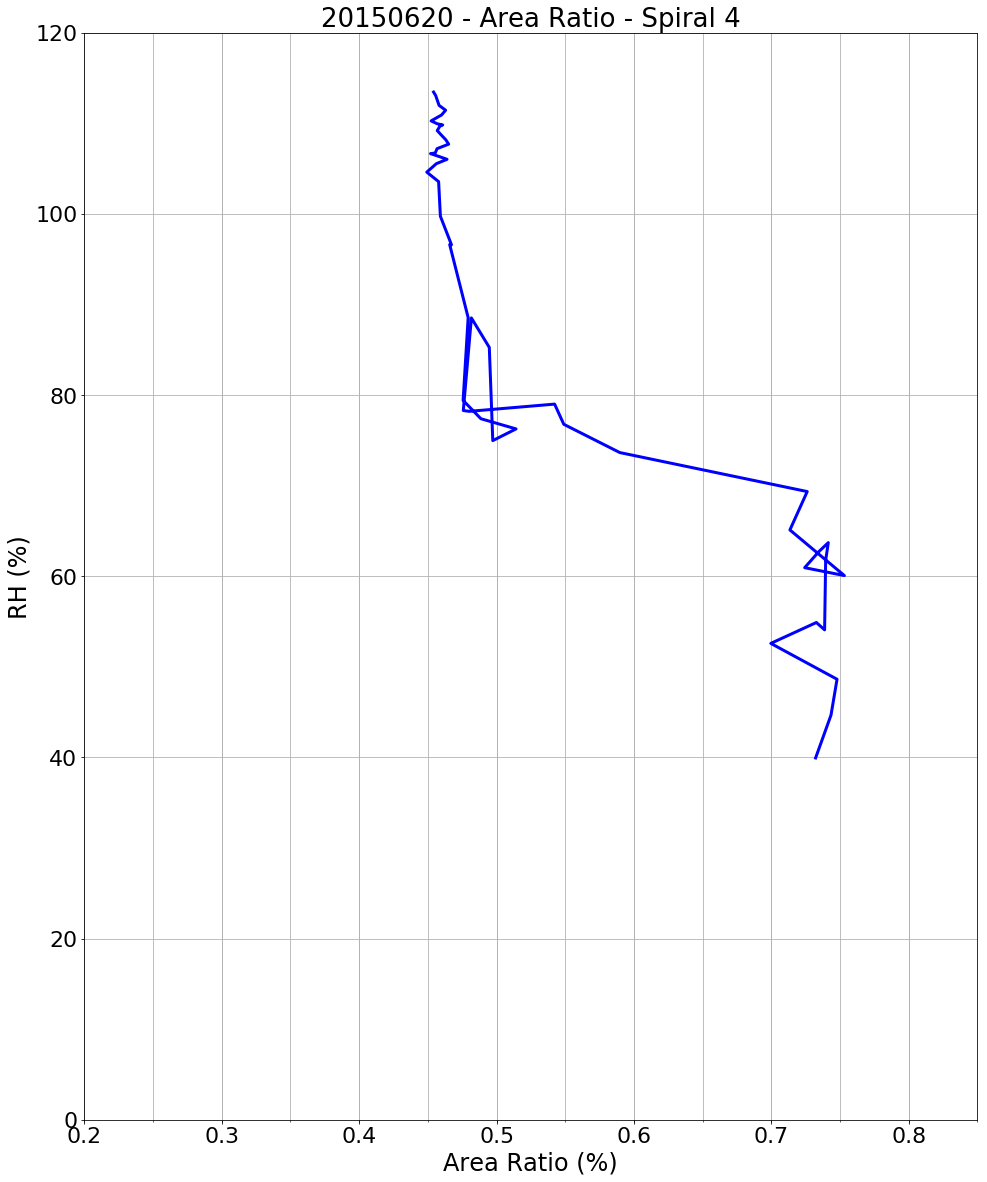

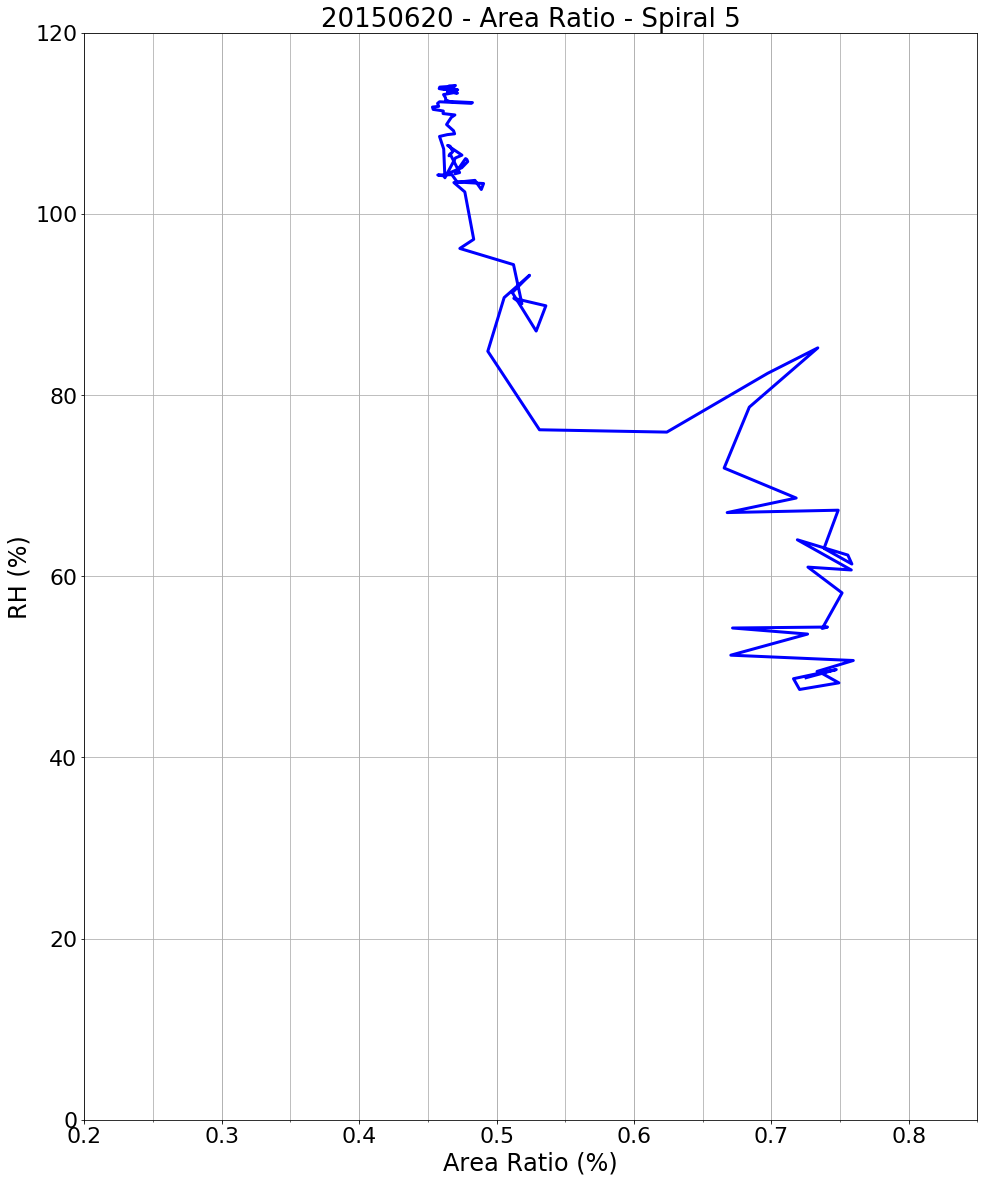

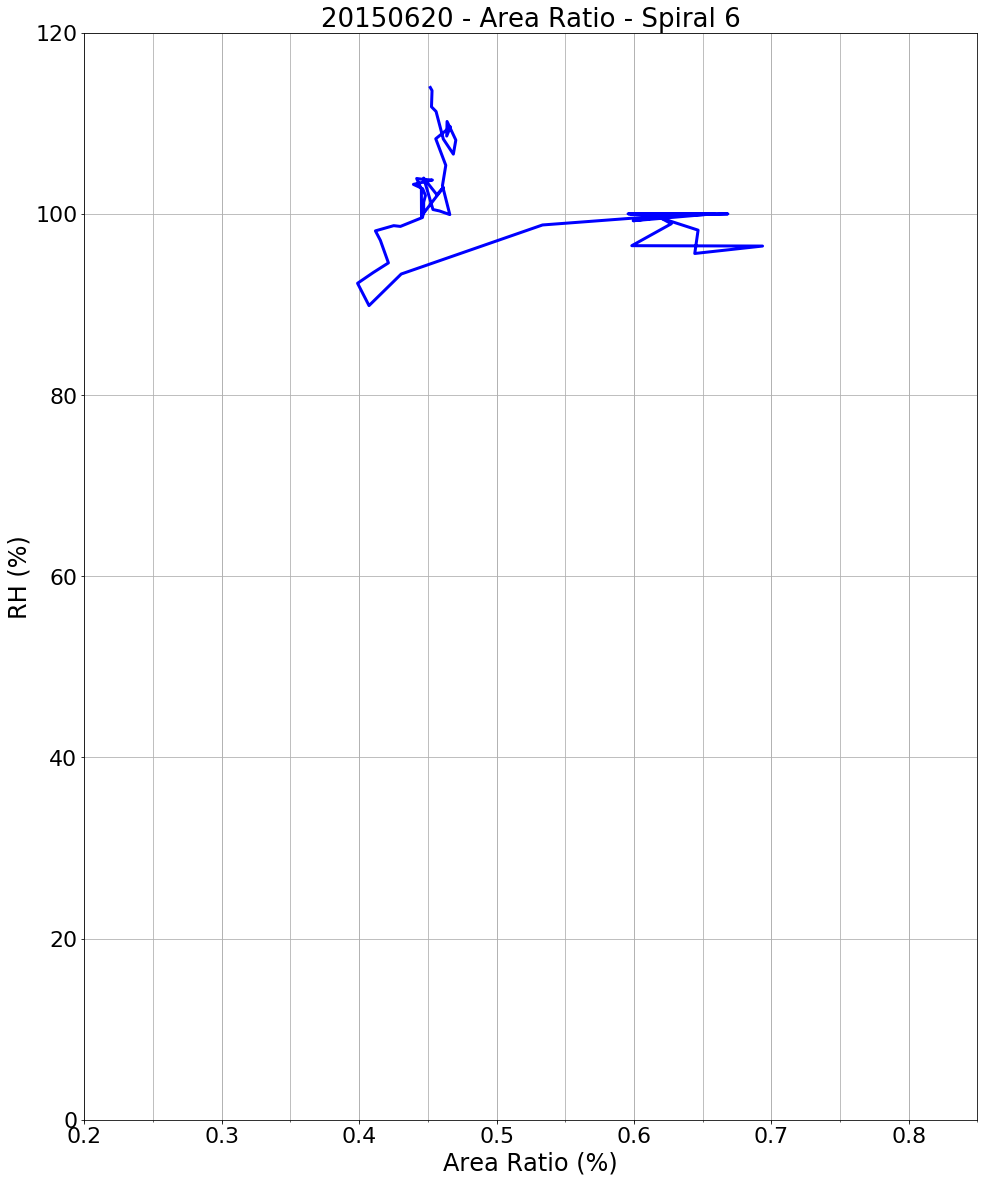

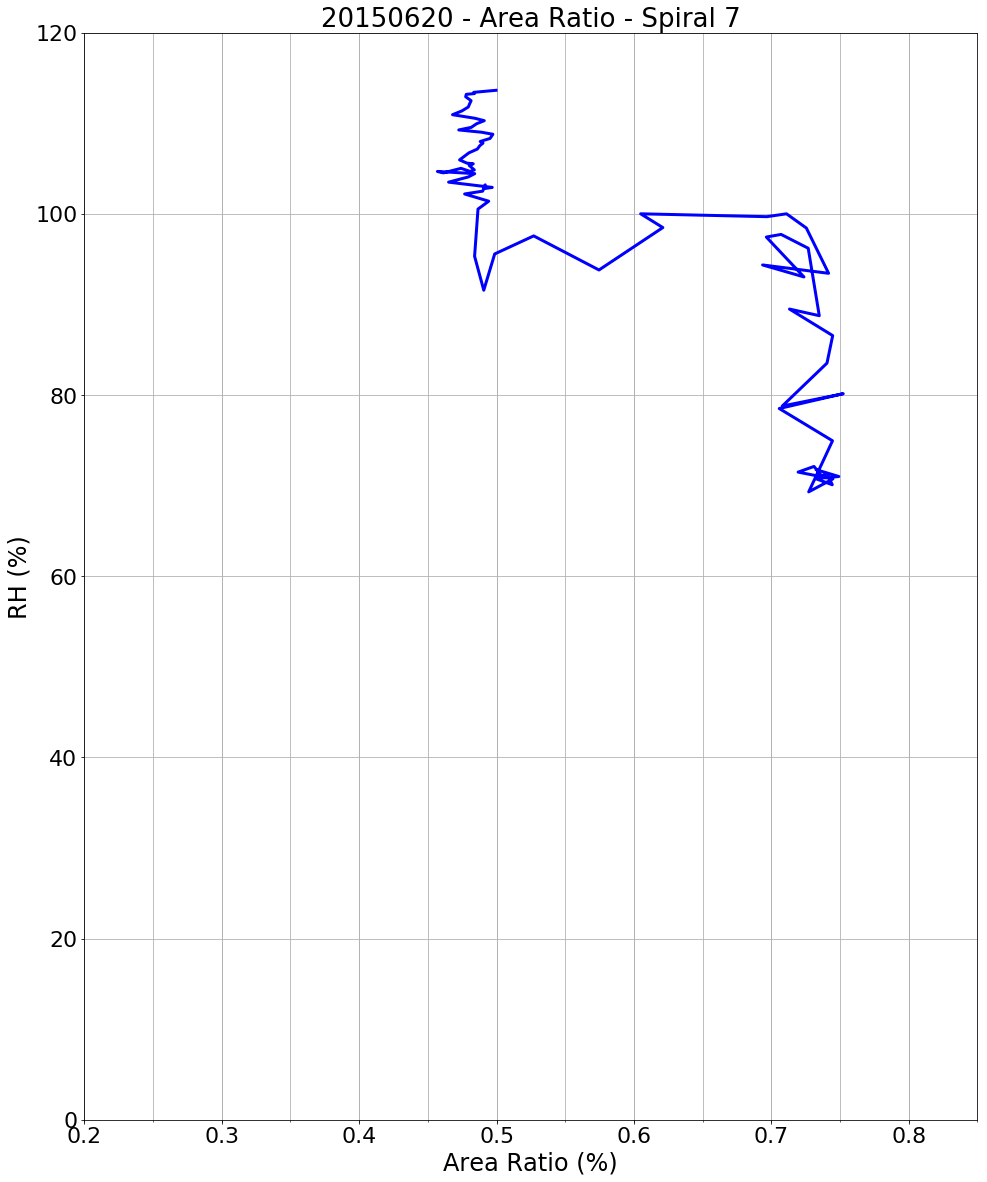

In [5]:
# Define temperature bin edges and determine bin midpoints
edgeMin = -19.0 - (binIntvl/2.)
edgeMax = 20.5 + (binIntvl/2.)
edgesTemp = np.arange(edgeMin,edgeMax,binIntvl)
bin_mid = (edgesTemp[0:-1] + edgesTemp[1:])/2
numBins = len(edgesTemp)-1

for flight in flights:
    print('Working on {}...'.format(flight))
    
    figSavePath = '{}/{}'.format(savePath,flight)
    if not os.path.exists(figSavePath):
        os.makedirs(figSavePath)
    
    # Dictionaries to hold all spiral data in each zone for a given flight
    tzAll = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
    srAll = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
    arAll = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
    
    cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'
    pecanPrmF = '/Users/danstechman/GoogleDrive/PECAN-Data/' + flight + '_PECANparams.nc'
    
    # Pull out any PECAN parameters
    pecanPrms = xr.open_dataset(pecanPrmF,decode_times=False)
    mlBotTemp = pecanPrms.mlBotTemp.data
    mlTopTemp = pecanPrms.mlTopTemp.data

    # Pull out any global variables/attributes from the netcdf file
    cipData_root = xr.open_dataset(cipFile)
    sprlZone = str(cipData_root.sprlZone.data,'utf-8')
    mcsType = str(cipData_root.mcsType.data,'utf-8')
    numSprls = len(sprlZone)

    # Loop over each spiral for the current flight
    for ix in np.arange(0,numSprls):
        print('\tAnalyzing Spiral {}'.format(ix+1))
######### Dicitionaries to hold spiral zone data for current spiral
        sprlData = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': []}
        
        # Open the group associated with the current spiral
        cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

        sprlData['tempC'].append(cipData.tempC_10s.data.tolist())
        sprlData['rh'].append(cipData.rh_10s.data.tolist())
        sprlData['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
        sprlData['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
        sprlData['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
        sprlData['ar'].append(cipData.areaRatio_10s.data.tolist())
        sprlData['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
        sprlData['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
        
        
        if sprlZone[ix] == 'T':
            tzAll['tempC'].append(cipData.tempC_10s.data.tolist())
            tzAll['rh'].append(cipData.rh_10s.data.tolist())
            tzAll['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            tzAll['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
            tzAll['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
            tzAll['ar'].append(cipData.areaRatio_10s.data.tolist())
            tzAll['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
            tzAll['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
            
        if sprlZone[ix] == 'S':
            srAll['tempC'].append(cipData.tempC_10s.data.tolist())
            srAll['rh'].append(cipData.rh_10s.data.tolist())
            srAll['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            srAll['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
            srAll['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
            srAll['ar'].append(cipData.areaRatio_10s.data.tolist())
            srAll['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
            srAll['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
            
        if sprlZone[ix] == 'A':
            arAll['tempC'].append(cipData.tempC_10s.data.tolist())
            arAll['rh'].append(cipData.rh_10s.data.tolist())
            arAll['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
            arAll['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
            arAll['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
            arAll['ar'].append(cipData.areaRatio_10s.data.tolist())
            arAll['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
            arAll['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
                        
        
        # Pull out all the data for each variable and place within a single list    
        sprlData['tempC'] = [i for sublist in sprlData['tempC'] for i in sublist]
        sprlData['rh'] = [i for sublist in sprlData['rh'] for i in sublist]
        sprlData['Nt'] = [i for sublist in sprlData['Nt'] for i in sublist]
        sprlData['twc'] = [i for sublist in sprlData['twc'] for i in sublist]
        sprlData['Dmm'] = [i for sublist in sprlData['Dmm'] for i in sublist]
        sprlData['ar'] = [i for sublist in sprlData['ar'] for i in sublist]
        sprlData['re'] = [i for sublist in sprlData['re'] for i in sublist]
        sprlData['rjctRatio'] = [i for sublist in sprlData['rjctRatio'] for i in sublist]

        # Convert the lists in each dictionary to numpy arrays
        sprlData = {key: np.array(val) for key, val in sprlData.items()}
        
        # Change units as desired for any variables
        sprlData['re'] = sprlData['re']/1000 # Convert from um to mm
        
        # Set 0's to NaNs in variables where the 0's cause issues
        #   with the fill plotting (and where a 0 vs. a NaN do not 
        #   make a difference scientifically in my case)
        sprlData['Dmm'][sprlData['Dmm'] == 0] = np.nan
        sprlData['Nt'][sprlData['Nt'] == 0] = np.nan
        sprlData['twc'][sprlData['twc'] == 0] = np.nan
        
        
########### Initialize temperature bins and create empty variables for our stats
        # Determine which bins each of the temperatures correspond to within each MCS zone
        whichBinTemp_sprl = np.digitize(sprlData['tempC'],edgesTemp)
        
        # Define arrays filled with NaNs to hold the min/max/mean/quantiles
        #    for each variable and at each temperature bin
        binRH_min_sprl, binRH_max_sprl, binRH_mean_sprl, binRH_median_sprl, binRH_10pct_sprl, binRH_25pct_sprl, binRH_75pct_sprl, binRH_90pct_sprl, \
        binNt_min_sprl, binNt_max_sprl, binNt_mean_sprl, binNt_median_sprl, binNt_10pct_sprl, binNt_25pct_sprl, binNt_75pct_sprl, binNt_90pct_sprl, \
        binTWC_min_sprl, binTWC_max_sprl, binTWC_mean_sprl, binTWC_median_sprl, binTWC_10pct_sprl, binTWC_25pct_sprl, binTWC_75pct_sprl, binTWC_90pct_sprl, \
        binDmm_min_sprl, binDmm_max_sprl, binDmm_mean_sprl, binDmm_median_sprl, binDmm_10pct_sprl, binDmm_25pct_sprl, binDmm_75pct_sprl, binDmm_90pct_sprl, \
        binARat_min_sprl, binARat_max_sprl, binARat_mean_sprl, binARat_median_sprl, binARat_10pct_sprl, binARat_25pct_sprl, binARat_75pct_sprl, binARat_90pct_sprl, \
        binRE_min_sprl, binRE_max_sprl, binRE_mean_sprl, binRE_median_sprl, binRE_10pct_sprl, binRE_25pct_sprl, binRE_75pct_sprl, binRE_90pct_sprl, \
        binRjcR_min_sprl, binRjcR_max_sprl, binRjcR_mean_sprl, binRjcR_median_sprl, binRjcR_10pct_sprl, binRjcR_25pct_sprl, binRjcR_75pct_sprl, binRjcR_90pct_sprl, \
            = [np.full(numBins,np.nan) for i in range(56)]
            
            
########### Bin data by temperature and calculate stats
        # Loop through the temperature bins and determine the indices of the
        #    temperature variable corresponding to temps within said bin
        #    Then, use these indices to refer to the appropriate values in each of
        #    our variables of interest
        with warnings.catch_warnings():
            # Many of our variables have temp bins with all NaNs which will 
            #    throw runtime warnings everytime we try to use nan*math functions
            #    Here we just tell python to ignore these specific warnings to unclutter
            #    the output
            warnings.filterwarnings('ignore', 'All-NaN (slice|axis) encountered')
            warnings.filterwarnings('ignore', 'Mean of empty slice')
            for ib in range(0,numBins):
                binMatch_sprl = np.squeeze(np.where(whichBinTemp_sprl == ib))
                
                binRH_sprl = sprlData['rh'][binMatch_sprl]
                binNt_sprl = sprlData['Nt'][binMatch_sprl]
                binTWC_sprl = sprlData['twc'][binMatch_sprl]
                binDmm_sprl = sprlData['Dmm'][binMatch_sprl]
                binARat_sprl = sprlData['ar'][binMatch_sprl]
                binRE_sprl = sprlData['re'][binMatch_sprl]
                binRjcR_sprl = sprlData['rjctRatio'][binMatch_sprl]

                if np.any(binMatch_sprl):
                    binRH_min_sprl[ib] = np.nanmin(binRH_sprl)
                    binRH_max_sprl[ib] = np.nanmax(binRH_sprl)
                    binRH_mean_sprl[ib] = np.nanmean(binRH_sprl)
                    binRH_median_sprl[ib] = np.nanmedian(binRH_sprl)
                    binRH_10pct_sprl[ib] = np.nanpercentile(binRH_sprl,10)
                    binRH_25pct_sprl[ib] = np.nanpercentile(binRH_sprl,25)
                    binRH_75pct_sprl[ib] = np.nanpercentile(binRH_sprl,75)
                    binRH_90pct_sprl[ib] = np.nanpercentile(binRH_sprl,90)

                    binNt_min_sprl[ib] = np.nanmin(binNt_sprl)
                    binNt_max_sprl[ib] = np.nanmax(binNt_sprl)
                    binNt_mean_sprl[ib] = np.nanmean(binNt_sprl)
                    binNt_median_sprl[ib] = np.nanmedian(binNt_sprl)
                    binNt_10pct_sprl[ib] = np.nanpercentile(binNt_sprl,10)
                    binNt_25pct_sprl[ib] = np.nanpercentile(binNt_sprl,25)
                    binNt_75pct_sprl[ib] = np.nanpercentile(binNt_sprl,75)
                    binNt_90pct_sprl[ib] = np.nanpercentile(binNt_sprl,90)

                    binTWC_min_sprl[ib] = np.nanmin(binTWC_sprl)
                    binTWC_max_sprl[ib] = np.nanmax(binTWC_sprl)
                    binTWC_mean_sprl[ib] = np.nanmean(binTWC_sprl)
                    binTWC_median_sprl[ib] = np.nanmedian(binTWC_sprl)
                    binTWC_10pct_sprl[ib] = np.nanpercentile(binTWC_sprl,10)
                    binTWC_25pct_sprl[ib] = np.nanpercentile(binTWC_sprl,25)
                    binTWC_75pct_sprl[ib] = np.nanpercentile(binTWC_sprl,75)
                    binTWC_90pct_sprl[ib] = np.nanpercentile(binTWC_sprl,90)

                    binDmm_min_sprl[ib] = np.nanmin(binDmm_sprl)
                    binDmm_max_sprl[ib] = np.nanmax(binDmm_sprl)
                    binDmm_mean_sprl[ib] = np.nanmean(binDmm_sprl)
                    binDmm_median_sprl[ib] = np.nanmedian(binDmm_sprl)
                    binDmm_10pct_sprl[ib] = np.nanpercentile(binDmm_sprl,10)
                    binDmm_25pct_sprl[ib] = np.nanpercentile(binDmm_sprl,25)
                    binDmm_75pct_sprl[ib] = np.nanpercentile(binDmm_sprl,75)
                    binDmm_90pct_sprl[ib] = np.nanpercentile(binDmm_sprl,90)

                    binARat_min_sprl[ib] = np.nanmin(binARat_sprl)
                    binARat_max_sprl[ib] = np.nanmax(binARat_sprl)
                    binARat_mean_sprl[ib] = np.nanmean(binARat_sprl)
                    binARat_median_sprl[ib] = np.nanmedian(binARat_sprl)
                    binARat_10pct_sprl[ib] = np.nanpercentile(binARat_sprl,10)
                    binARat_25pct_sprl[ib] = np.nanpercentile(binARat_sprl,25)
                    binARat_75pct_sprl[ib] = np.nanpercentile(binARat_sprl,75)
                    binARat_90pct_sprl[ib] = np.nanpercentile(binARat_sprl,90)

                    binRE_min_sprl[ib] = np.nanmin(binRE_sprl)
                    binRE_max_sprl[ib] = np.nanmax(binRE_sprl)
                    binRE_mean_sprl[ib] = np.nanmean(binRE_sprl)
                    binRE_median_sprl[ib] = np.nanmedian(binRE_sprl)
                    binRE_10pct_sprl[ib] = np.nanpercentile(binRE_sprl,10)
                    binRE_25pct_sprl[ib] = np.nanpercentile(binRE_sprl,25)
                    binRE_75pct_sprl[ib] = np.nanpercentile(binRE_sprl,75)
                    binRE_90pct_sprl[ib] = np.nanpercentile(binRE_sprl,90)

                    binRjcR_min_sprl[ib] = np.nanmin(binRjcR_sprl)
                    binRjcR_max_sprl[ib] = np.nanmax(binRjcR_sprl)
                    binRjcR_mean_sprl[ib] = np.nanmean(binRjcR_sprl)
                    binRjcR_median_sprl[ib] = np.nanmedian(binRjcR_sprl)
                    binRjcR_10pct_sprl[ib] = np.nanpercentile(binRjcR_sprl,10)
                    binRjcR_25pct_sprl[ib] = np.nanpercentile(binRjcR_sprl,25)
                    binRjcR_75pct_sprl[ib] = np.nanpercentile(binRjcR_sprl,75)
                    binRjcR_90pct_sprl[ib] = np.nanpercentile(binRjcR_sprl,90)
        
        
        
######### Set plot-title-specific strings
        if mcsType[ix] == 'F':
            typStr = 'Trailing Strat. (formative)'
        if mcsType[ix] == 'M':
            typStr = 'Trailing Strat. (mature)'
        if mcsType[ix] == 'P':
            typStr = 'Parallel Strat.'
        if mcsType[ix] == 'L':
            typStr = 'Leading Strat.'
        if mcsType[ix] == 'C':
            typStr = 'Cluster MCS'
            
        if sprlZone[ix] == 'T':
            zoneStr = 'Transition Zone'
        if sprlZone[ix] == 'S':
            zoneStr = 'Enh. Strat. Rain Region'
        if sprlZone[ix] == 'A':
            zoneStr = 'Anvil Region'
        
        # RIJ spirals (all but #3 and #6 from 20 June)
        # (Remember that ix is 0-based, i.e., ix=2 is actually spiral 3)
        if flight == '20150620':
            if ix in [0,1]:
                rijStr = ' - RIJ Notch'
            elif ix in [3,4,6]:
                rijStr = ' - RIJ'
            else:
                rijStr = ''
        else:
            rijStr = ''

########### Single Spiral Plotting ###########
        if plotSepSprls:
            if plotRH:
                fig, ax = plt.subplots(figsize=(16,20))

                
                ax.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax.plot(sprlData['rh'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)
                

                ax.invert_yaxis()
                ax.set_xlim(rhLim)
                ax.set_ylim(tempLim)
                ax.set_xlabel('Relative Humidity (%)',fontsize=24)
                ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax.tick_params(axis='both', which='major', labelsize=22)
                ax.set_title('{} - RH - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.grid(which='both')
                ax.legend(loc='lower left',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_RH_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig)
                    
            if plotNt:
                fig2, ax2 = plt.subplots(figsize=(16,20))

                ax2.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax2.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax2.plot(sprlData['Nt'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax2.invert_yaxis()
                ax2.set_xlim(NtLim)
                ax2.set_ylim(tempLim)
                ax2.set_xscale('log',nonposx='mask')
                ax2.set_xlabel('Total Number Concentration ($cm^{-3}$)',fontsize=24)
                ax2.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax2.tick_params(axis='both', which='major', labelsize=22)
                ax2.set_title('{} - $N_t$ - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax2.grid(which='both')
                ax2.legend(loc='upper left',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_Nt_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig2.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig2)
                    
            if plotTWC:
                fig3, ax3 = plt.subplots(figsize=(16,20))

                ax3.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax3.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax3.plot(sprlData['twc'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax3.invert_yaxis()
                ax3.set_xscale('log',nonposx='mask')
                ax3.set_xlim(twcLim)
                ax3.set_ylim(tempLim)
                ax3.set_xlabel('Total Water Content ($g\ m^{-3}$)',fontsize=24)
                ax3.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax3.tick_params(axis='both', which='major', labelsize=22)
                ax3.set_title('{} - TWC - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax3.grid(which='both')
                ax3.legend(loc='upper left',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_TWC_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig3.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig3)
                    
            if plotDmm:
                fig4, ax4 = plt.subplots(figsize=(16,20))

                ax4.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax4.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax4.plot(sprlData['Dmm'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax4.invert_yaxis()
                ax4.set_xlim(DmmLim)
                ax4.set_ylim(tempLim)
                ax4.set_xlabel('Median Mass Diameter (mm)',fontsize=24)
                ax4.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax4.tick_params(axis='both', which='major', labelsize=22)
                ax4.set_title('{} - $D_{{mm}}$ - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax4.xaxis.set_minor_locator(MultipleLocator(0.25))
                ax4.grid(which='both')
                ax4.legend(loc='upper right',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_Dmm_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig4.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig4)
                    
            if plotARat:
                fig5, ax5 = plt.subplots(figsize=(16,20))

                ax5.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax5.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax5.plot(sprlData['ar'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax5.invert_yaxis()
                ax5.set_xlim(ARatLim)
                ax5.set_ylim(tempLim)
                ax5.set_xlabel('Area Ratio (%)',fontsize=24)
                ax5.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax5.tick_params(axis='both', which='major', labelsize=22)
                ax5.set_title('{} - Area Ratio - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax5.xaxis.set_minor_locator(MultipleLocator(0.05))
                ax5.grid(which='both')
                ax5.legend(loc='upper right',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_ARatio_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig5.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig5)
                

    
            if plotARatRH:
                fig8, ax8 = plt.subplots(figsize=(16,20))

                ax8.plot(sprlData['ar'],sprlData['rh'],color='b',linewidth=3)

                ax8.set_xlim(ARatLim)
                ax8.set_ylim(rhLim)
                ax8.set_xlabel('Area Ratio (%)',fontsize=24)
                ax8.set_ylabel('RH (%)',fontsize=24)
                ax8.tick_params(axis='both', which='major', labelsize=22)
                ax8.set_title('{} - Area Ratio - Spiral {}'.format(flight,ix+1),fontsize=26)
                ax8.xaxis.set_minor_locator(MultipleLocator(0.05))
                ax8.grid(which='both')
                # Save the output figure
                saveStr = '{}/{}_ARatioRH_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig8.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig8)
                   

 
            if plotRE:
                fig6, ax6 = plt.subplots(figsize=(16,20))

                ax6.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax6.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax6.plot(sprlData['re'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax6.invert_yaxis()
                ax6.set_xlim(reLim)
                ax6.set_ylim(tempLim)
                ax6.set_xlabel('Effective Radius (mm)',fontsize=24)
                ax6.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax6.tick_params(axis='both', which='major', labelsize=22)
                ax6.set_title('{} - $R_e$ - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax6.xaxis.set_minor_locator(MultipleLocator(0.01))
                ax6.grid(which='both')
                ax6.legend(loc='upper right',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_RE_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig6.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig6)
                    
            if plotRjcR:
                fig7, ax7 = plt.subplots(figsize=(16,20))

                ax7.axhline(y=mlTopTemp[ix],color='black',linestyle='--',linewidth=3,label='ML Top')
                ax7.axhline(y=mlBotTemp[ix],color='red',linestyle='--',linewidth=3,label='ML Bottom')
                ax7.plot(sprlData['rjctRatio'],sprlData['tempC'],'bo',markeredgecolor='white',markeredgewidth=1,markersize=12)

                ax7.invert_yaxis()
                ax7.set_xlim(RjcrLim)
                ax7.set_ylim(tempLim)
                ax7.set_xlabel('Reject Ratio (%)',fontsize=24)
                ax7.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
                ax7.tick_params(axis='both', which='major', labelsize=22)
                ax7.set_title('{} - Reject Ratio - Spiral {}\n{} - {}{}'.format(flight,ix+1,typStr,zoneStr,rijStr),fontsize=26)
                ax7.xaxis.set_minor_locator(MultipleLocator(0.05))
                ax7.grid(which='both')
                ax7.legend(loc='upper right',fontsize=18)
                # Save the output figure
                saveStr = '{}/{}_RjcR_sprl{:02d}.{}'.format(figSavePath,flight,ix+1,fType)
                if noDispSave:
                    fig7.savefig(saveStr,bbox_inches='tight')
                    plt.close(fig7)
                    
    
    
##### Pull out all the data for each full-flight variable and place within a single list
    tzAll['tempC'] = [i for sublist in tzAll['tempC'] for i in sublist]
    tzAll['rh'] = [i for sublist in tzAll['rh'] for i in sublist]
    tzAll['Nt'] = [i for sublist in tzAll['Nt'] for i in sublist]
    tzAll['twc'] = [i for sublist in tzAll['twc'] for i in sublist]
    tzAll['Dmm'] = [i for sublist in tzAll['Dmm'] for i in sublist]
    tzAll['ar'] = [i for sublist in tzAll['ar'] for i in sublist]
    tzAll['re'] = [i for sublist in tzAll['re'] for i in sublist]
    tzAll['rjctRatio'] = [i for sublist in tzAll['rjctRatio'] for i in sublist]

    srAll['tempC'] = [i for sublist in srAll['tempC'] for i in sublist]
    srAll['rh'] = [i for sublist in srAll['rh'] for i in sublist]
    srAll['Nt'] = [i for sublist in srAll['Nt'] for i in sublist]
    srAll['twc'] = [i for sublist in srAll['twc'] for i in sublist]
    srAll['Dmm'] = [i for sublist in srAll['Dmm'] for i in sublist]
    srAll['ar'] = [i for sublist in srAll['ar'] for i in sublist]
    srAll['re'] = [i for sublist in srAll['re'] for i in sublist]
    srAll['rjctRatio'] = [i for sublist in srAll['rjctRatio'] for i in sublist]

    arAll['tempC'] = [i for sublist in arAll['tempC'] for i in sublist]
    arAll['rh'] = [i for sublist in arAll['rh'] for i in sublist]
    arAll['Nt'] = [i for sublist in arAll['Nt'] for i in sublist]
    arAll['twc'] = [i for sublist in arAll['twc'] for i in sublist]
    arAll['Dmm'] = [i for sublist in arAll['Dmm'] for i in sublist]
    arAll['ar'] = [i for sublist in arAll['ar'] for i in sublist]
    arAll['re'] = [i for sublist in arAll['re'] for i in sublist]
    arAll['rjctRatio'] = [i for sublist in arAll['rjctRatio'] for i in sublist]

    # Convert the lists in each dictionary to numpy arrays
    tzAll = {key: np.array(val) for key, val in tzAll.items()}
    srAll = {key: np.array(val) for key, val in srAll.items()}
    arAll = {key: np.array(val) for key, val in arAll.items()}

    # Change units as desired for any variables
    tzAll['re'] = tzAll['re']/1000 # Convert from um to mm
    srAll['re'] = srAll['re']/1000
    arAll['re'] = arAll['re']/1000
    
    # Set 0's to NaNs in variables where the 0's cause issues
    #   with the fill plotting (and where a 0 vs. a NaN do not 
    #   make a difference scientifically in my case)
    tzAll['Dmm'][tzAll['Dmm'] == 0] = np.nan 
    srAll['Dmm'][srAll['Dmm'] == 0] = np.nan
    arAll['Dmm'][arAll['Dmm'] == 0] = np.nan
    tzAll['Nt'][tzAll['Nt'] == 0] = np.nan 
    srAll['Nt'][srAll['Nt'] == 0] = np.nan
    arAll['Nt'][arAll['Nt'] == 0] = np.nan
    tzAll['twc'][tzAll['twc'] == 0] = np.nan 
    srAll['twc'][srAll['twc'] == 0] = np.nan
    arAll['twc'][arAll['twc'] == 0] = np.nan

####### Initialize temperature bins and create empty variables for our stats
    whichBinTemp_TZall = np.digitize(tzAll['tempC'],edgesTemp)
    whichBinTemp_SRall = np.digitize(srAll['tempC'],edgesTemp)
    whichBinTemp_ARall = np.digitize(arAll['tempC'],edgesTemp)

    # Define arrays filled with NaNs to hold the min/max/mean/quantiles
    binRH_min_TZall, binRH_max_TZall, binRH_mean_TZall, binRH_median_TZall, binRH_10pct_TZall, binRH_25pct_TZall, binRH_75pct_TZall, binRH_90pct_TZall, \
    binNt_min_TZall, binNt_max_TZall, binNt_mean_TZall, binNt_median_TZall, binNt_10pct_TZall, binNt_25pct_TZall, binNt_75pct_TZall, binNt_90pct_TZall, \
    binTWC_min_TZall, binTWC_max_TZall, binTWC_mean_TZall, binTWC_median_TZall, binTWC_10pct_TZall, binTWC_25pct_TZall, binTWC_75pct_TZall, binTWC_90pct_TZall, \
    binDmm_min_TZall, binDmm_max_TZall, binDmm_mean_TZall, binDmm_median_TZall, binDmm_10pct_TZall, binDmm_25pct_TZall, binDmm_75pct_TZall, binDmm_90pct_TZall, \
    binARat_min_TZall, binARat_max_TZall, binARat_mean_TZall, binARat_median_TZall, binARat_10pct_TZall, binARat_25pct_TZall, binARat_75pct_TZall, binARat_90pct_TZall, \
    binRE_min_TZall, binRE_max_TZall, binRE_mean_TZall, binRE_median_TZall, binRE_10pct_TZall, binRE_25pct_TZall, binRE_75pct_TZall, binRE_90pct_TZall, \
    binRjcR_min_TZall, binRjcR_max_TZall, binRjcR_mean_TZall, binRjcR_median_TZall, binRjcR_10pct_TZall, binRjcR_25pct_TZall, binRjcR_75pct_TZall, binRjcR_90pct_TZall, \
        = [np.full(numBins,np.nan) for i in range(56)]

    binRH_min_SRall, binRH_max_SRall, binRH_mean_SRall, binRH_median_SRall, binRH_10pct_SRall, binRH_25pct_SRall, binRH_75pct_SRall, binRH_90pct_SRall, \
    binNt_min_SRall, binNt_max_SRall, binNt_mean_SRall, binNt_median_SRall, binNt_10pct_SRall, binNt_25pct_SRall, binNt_75pct_SRall, binNt_90pct_SRall, \
    binTWC_min_SRall, binTWC_max_SRall, binTWC_mean_SRall, binTWC_median_SRall, binTWC_10pct_SRall, binTWC_25pct_SRall, binTWC_75pct_SRall, binTWC_90pct_SRall, \
    binDmm_min_SRall, binDmm_max_SRall, binDmm_mean_SRall, binDmm_median_SRall, binDmm_10pct_SRall, binDmm_25pct_SRall, binDmm_75pct_SRall, binDmm_90pct_SRall, \
    binARat_min_SRall, binARat_max_SRall, binARat_mean_SRall, binARat_median_SRall, binARat_10pct_SRall, binARat_25pct_SRall, binARat_75pct_SRall, binARat_90pct_SRall, \
    binRE_min_SRall, binRE_max_SRall, binRE_mean_SRall, binRE_median_SRall, binRE_10pct_SRall, binRE_25pct_SRall, binRE_75pct_SRall, binRE_90pct_SRall, \
    binRjcR_min_SRall, binRjcR_max_SRall, binRjcR_mean_SRall, binRjcR_median_SRall, binRjcR_10pct_SRall, binRjcR_25pct_SRall, binRjcR_75pct_SRall, binRjcR_90pct_SRall, \
        = [np.full(numBins,np.nan) for i in range(56)]

    binRH_min_ARall, binRH_max_ARall, binRH_mean_ARall, binRH_median_ARall, binRH_10pct_ARall, binRH_25pct_ARall, binRH_75pct_ARall, binRH_90pct_ARall, \
    binNt_min_ARall, binNt_max_ARall, binNt_mean_ARall, binNt_median_ARall, binNt_10pct_ARall, binNt_25pct_ARall, binNt_75pct_ARall, binNt_90pct_ARall, \
    binTWC_min_ARall, binTWC_max_ARall, binTWC_mean_ARall, binTWC_median_ARall, binTWC_10pct_ARall, binTWC_25pct_ARall, binTWC_75pct_ARall, binTWC_90pct_ARall, \
    binDmm_min_ARall, binDmm_max_ARall, binDmm_mean_ARall, binDmm_median_ARall, binDmm_10pct_ARall, binDmm_25pct_ARall, binDmm_75pct_ARall, binDmm_90pct_ARall, \
    binARat_min_ARall, binARat_max_ARall, binARat_mean_ARall, binARat_median_ARall, binARat_10pct_ARall, binARat_25pct_ARall, binARat_75pct_ARall, binARat_90pct_ARall, \
    binRE_min_ARall, binRE_max_ARall, binRE_mean_ARall, binRE_median_ARall, binRE_10pct_ARall, binRE_25pct_ARall, binRE_75pct_ARall, binRE_90pct_ARall, \
    binRjcR_min_ARall, binRjcR_max_ARall, binRjcR_mean_ARall, binRjcR_median_ARall, binRjcR_10pct_ARall, binRjcR_25pct_ARall, binRjcR_75pct_ARall, binRjcR_90pct_ARall, \
        = [np.full(numBins,np.nan) for i in range(56)]

####### Bin data by temperature and calculate stats
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', 'All-NaN (slice|axis) encountered')
        warnings.filterwarnings('ignore', 'Mean of empty slice')
        for ib in range(0,numBins):
            binMatch_TZall = np.squeeze(np.where(whichBinTemp_TZall == ib))
            binMatch_SRall = np.squeeze(np.where(whichBinTemp_SRall == ib))
            binMatch_ARall = np.squeeze(np.where(whichBinTemp_ARall == ib))


            binRH_TZall = tzAll['rh'][binMatch_TZall]
            binRH_SRall = srAll['rh'][binMatch_SRall]
            binRH_ARall = arAll['rh'][binMatch_ARall]
            binNt_TZall = tzAll['Nt'][binMatch_TZall]
            binNt_SRall = srAll['Nt'][binMatch_SRall]
            binNt_ARall = arAll['Nt'][binMatch_ARall]
            binTWC_TZall = tzAll['twc'][binMatch_TZall]
            binTWC_SRall = srAll['twc'][binMatch_SRall]
            binTWC_ARall = arAll['twc'][binMatch_ARall]
            binDmm_TZall = tzAll['Dmm'][binMatch_TZall]
            binDmm_SRall = srAll['Dmm'][binMatch_SRall]
            binDmm_ARall = arAll['Dmm'][binMatch_ARall]
            binARat_TZall = tzAll['ar'][binMatch_TZall]
            binARat_SRall = srAll['ar'][binMatch_SRall]
            binARat_ARall = arAll['ar'][binMatch_ARall]
            binRE_TZall = tzAll['re'][binMatch_TZall]
            binRE_SRall = srAll['re'][binMatch_SRall]
            binRE_ARall = arAll['re'][binMatch_ARall]
            binRjcR_TZall = tzAll['rjctRatio'][binMatch_TZall]
            binRjcR_SRall = srAll['rjctRatio'][binMatch_SRall]
            binRjcR_ARall = arAll['rjctRatio'][binMatch_ARall]

            if np.any(binMatch_TZall):
                binRH_min_TZall[ib] = np.nanmin(binRH_TZall)
                binRH_max_TZall[ib] = np.nanmax(binRH_TZall)
                binRH_mean_TZall[ib] = np.nanmean(binRH_TZall)
                binRH_median_TZall[ib] = np.nanmedian(binRH_TZall)
                binRH_10pct_TZall[ib] = np.nanpercentile(binRH_TZall,10)
                binRH_25pct_TZall[ib] = np.nanpercentile(binRH_TZall,25)
                binRH_75pct_TZall[ib] = np.nanpercentile(binRH_TZall,75)
                binRH_90pct_TZall[ib] = np.nanpercentile(binRH_TZall,90)

                binNt_min_TZall[ib] = np.nanmin(binNt_TZall)
                binNt_max_TZall[ib] = np.nanmax(binNt_TZall)
                binNt_mean_TZall[ib] = np.nanmean(binNt_TZall)
                binNt_median_TZall[ib] = np.nanmedian(binNt_TZall)
                binNt_10pct_TZall[ib] = np.nanpercentile(binNt_TZall,10)
                binNt_25pct_TZall[ib] = np.nanpercentile(binNt_TZall,25)
                binNt_75pct_TZall[ib] = np.nanpercentile(binNt_TZall,75)
                binNt_90pct_TZall[ib] = np.nanpercentile(binNt_TZall,90)

                binTWC_min_TZall[ib] = np.nanmin(binTWC_TZall)
                binTWC_max_TZall[ib] = np.nanmax(binTWC_TZall)
                binTWC_mean_TZall[ib] = np.nanmean(binTWC_TZall)
                binTWC_median_TZall[ib] = np.nanmedian(binTWC_TZall)
                binTWC_10pct_TZall[ib] = np.nanpercentile(binTWC_TZall,10)
                binTWC_25pct_TZall[ib] = np.nanpercentile(binTWC_TZall,25)
                binTWC_75pct_TZall[ib] = np.nanpercentile(binTWC_TZall,75)
                binTWC_90pct_TZall[ib] = np.nanpercentile(binTWC_TZall,90)

                binDmm_min_TZall[ib] = np.nanmin(binDmm_TZall)
                binDmm_max_TZall[ib] = np.nanmax(binDmm_TZall)
                binDmm_mean_TZall[ib] = np.nanmean(binDmm_TZall)
                binDmm_median_TZall[ib] = np.nanmedian(binDmm_TZall)
                binDmm_10pct_TZall[ib] = np.nanpercentile(binDmm_TZall,10)
                binDmm_25pct_TZall[ib] = np.nanpercentile(binDmm_TZall,25)
                binDmm_75pct_TZall[ib] = np.nanpercentile(binDmm_TZall,75)
                binDmm_90pct_TZall[ib] = np.nanpercentile(binDmm_TZall,90)

                binARat_min_TZall[ib] = np.nanmin(binARat_TZall)
                binARat_max_TZall[ib] = np.nanmax(binARat_TZall)
                binARat_mean_TZall[ib] = np.nanmean(binARat_TZall)
                binARat_median_TZall[ib] = np.nanmedian(binARat_TZall)
                binARat_10pct_TZall[ib] = np.nanpercentile(binARat_TZall,10)
                binARat_25pct_TZall[ib] = np.nanpercentile(binARat_TZall,25)
                binARat_75pct_TZall[ib] = np.nanpercentile(binARat_TZall,75)
                binARat_90pct_TZall[ib] = np.nanpercentile(binARat_TZall,90)

                binRE_min_TZall[ib] = np.nanmin(binRE_TZall)
                binRE_max_TZall[ib] = np.nanmax(binRE_TZall)
                binRE_mean_TZall[ib] = np.nanmean(binRE_TZall)
                binRE_median_TZall[ib] = np.nanmedian(binRE_TZall)
                binRE_10pct_TZall[ib] = np.nanpercentile(binRE_TZall,10)
                binRE_25pct_TZall[ib] = np.nanpercentile(binRE_TZall,25)
                binRE_75pct_TZall[ib] = np.nanpercentile(binRE_TZall,75)
                binRE_90pct_TZall[ib] = np.nanpercentile(binRE_TZall,90)

                binRjcR_min_TZall[ib] = np.nanmin(binRjcR_TZall)
                binRjcR_max_TZall[ib] = np.nanmax(binRjcR_TZall)
                binRjcR_mean_TZall[ib] = np.nanmean(binRjcR_TZall)
                binRjcR_median_TZall[ib] = np.nanmedian(binRjcR_TZall)
                binRjcR_10pct_TZall[ib] = np.nanpercentile(binRjcR_TZall,10)
                binRjcR_25pct_TZall[ib] = np.nanpercentile(binRjcR_TZall,25)
                binRjcR_75pct_TZall[ib] = np.nanpercentile(binRjcR_TZall,75)
                binRjcR_90pct_TZall[ib] = np.nanpercentile(binRjcR_TZall,90)

            if np.any(binMatch_SRall):
                binRH_min_SRall[ib] = np.nanmin(binRH_SRall)
                binRH_max_SRall[ib] = np.nanmax(binRH_SRall)
                binRH_mean_SRall[ib] = np.nanmean(binRH_SRall)
                binRH_median_SRall[ib] = np.nanmedian(binRH_SRall)
                binRH_10pct_SRall[ib] = np.nanpercentile(binRH_SRall,10)
                binRH_25pct_SRall[ib] = np.nanpercentile(binRH_SRall,25)
                binRH_75pct_SRall[ib] = np.nanpercentile(binRH_SRall,75)
                binRH_90pct_SRall[ib] = np.nanpercentile(binRH_SRall,90)

                binNt_min_SRall[ib] = np.nanmin(binNt_SRall)
                binNt_max_SRall[ib] = np.nanmax(binNt_SRall)
                binNt_mean_SRall[ib] = np.nanmean(binNt_SRall)
                binNt_median_SRall[ib] = np.nanmedian(binNt_SRall)
                binNt_10pct_SRall[ib] = np.nanpercentile(binNt_SRall,10)
                binNt_25pct_SRall[ib] = np.nanpercentile(binNt_SRall,25)
                binNt_75pct_SRall[ib] = np.nanpercentile(binNt_SRall,75)
                binNt_90pct_SRall[ib] = np.nanpercentile(binNt_SRall,90)

                binTWC_min_SRall[ib] = np.nanmin(binTWC_SRall)
                binTWC_max_SRall[ib] = np.nanmax(binTWC_SRall)
                binTWC_mean_SRall[ib] = np.nanmean(binTWC_SRall)
                binTWC_median_SRall[ib] = np.nanmedian(binTWC_SRall)
                binTWC_10pct_SRall[ib] = np.nanpercentile(binTWC_SRall,10)
                binTWC_25pct_SRall[ib] = np.nanpercentile(binTWC_SRall,25)
                binTWC_75pct_SRall[ib] = np.nanpercentile(binTWC_SRall,75)
                binTWC_90pct_SRall[ib] = np.nanpercentile(binTWC_SRall,90)

                binDmm_min_SRall[ib] = np.nanmin(binDmm_SRall)
                binDmm_max_SRall[ib] = np.nanmax(binDmm_SRall)
                binDmm_mean_SRall[ib] = np.nanmean(binDmm_SRall)
                binDmm_median_SRall[ib] = np.nanmedian(binDmm_SRall)
                binDmm_10pct_SRall[ib] = np.nanpercentile(binDmm_SRall,10)
                binDmm_25pct_SRall[ib] = np.nanpercentile(binDmm_SRall,25)
                binDmm_75pct_SRall[ib] = np.nanpercentile(binDmm_SRall,75)
                binDmm_90pct_SRall[ib] = np.nanpercentile(binDmm_SRall,90)

                binARat_min_SRall[ib] = np.nanmin(binARat_SRall)
                binARat_max_SRall[ib] = np.nanmax(binARat_SRall)
                binARat_mean_SRall[ib] = np.nanmean(binARat_SRall)
                binARat_median_SRall[ib] = np.nanmedian(binARat_SRall)
                binARat_10pct_SRall[ib] = np.nanpercentile(binARat_SRall,10)
                binARat_25pct_SRall[ib] = np.nanpercentile(binARat_SRall,25)
                binARat_75pct_SRall[ib] = np.nanpercentile(binARat_SRall,75)
                binARat_90pct_SRall[ib] = np.nanpercentile(binARat_SRall,90)

                binRE_min_SRall[ib] = np.nanmin(binRE_SRall)
                binRE_max_SRall[ib] = np.nanmax(binRE_SRall)
                binRE_mean_SRall[ib] = np.nanmean(binRE_SRall)
                binRE_median_SRall[ib] = np.nanmedian(binRE_SRall)
                binRE_10pct_SRall[ib] = np.nanpercentile(binRE_SRall,10)
                binRE_25pct_SRall[ib] = np.nanpercentile(binRE_SRall,25)
                binRE_75pct_SRall[ib] = np.nanpercentile(binRE_SRall,75)
                binRE_90pct_SRall[ib] = np.nanpercentile(binRE_SRall,90)

                binRjcR_min_SRall[ib] = np.nanmin(binRjcR_SRall)
                binRjcR_max_SRall[ib] = np.nanmax(binRjcR_SRall)
                binRjcR_mean_SRall[ib] = np.nanmean(binRjcR_SRall)
                binRjcR_median_SRall[ib] = np.nanmedian(binRjcR_SRall)
                binRjcR_10pct_SRall[ib] = np.nanpercentile(binRjcR_SRall,10)
                binRjcR_25pct_SRall[ib] = np.nanpercentile(binRjcR_SRall,25)
                binRjcR_75pct_SRall[ib] = np.nanpercentile(binRjcR_SRall,75)
                binRjcR_90pct_SRall[ib] = np.nanpercentile(binRjcR_SRall,90)

            if np.any(binMatch_ARall):
                binRH_min_ARall[ib] = np.nanmin(binRH_ARall)
                binRH_max_ARall[ib] = np.nanmax(binRH_ARall)
                binRH_mean_ARall[ib] = np.nanmean(binRH_ARall)
                binRH_median_ARall[ib] = np.nanmedian(binRH_ARall)
                binRH_10pct_ARall[ib] = np.nanpercentile(binRH_ARall,10)
                binRH_25pct_ARall[ib] = np.nanpercentile(binRH_ARall,25)
                binRH_75pct_ARall[ib] = np.nanpercentile(binRH_ARall,75)
                binRH_90pct_ARall[ib] = np.nanpercentile(binRH_ARall,90)

                binNt_min_ARall[ib] = np.nanmin(binNt_ARall)
                binNt_max_ARall[ib] = np.nanmax(binNt_ARall)
                binNt_mean_ARall[ib] = np.nanmean(binNt_ARall)
                binNt_median_ARall[ib] = np.nanmedian(binNt_ARall)
                binNt_10pct_ARall[ib] = np.nanpercentile(binNt_ARall,10)
                binNt_25pct_ARall[ib] = np.nanpercentile(binNt_ARall,25)
                binNt_75pct_ARall[ib] = np.nanpercentile(binNt_ARall,75)
                binNt_90pct_ARall[ib] = np.nanpercentile(binNt_ARall,90)

                binTWC_min_ARall[ib] = np.nanmin(binTWC_ARall)
                binTWC_max_ARall[ib] = np.nanmax(binTWC_ARall)
                binTWC_mean_ARall[ib] = np.nanmean(binTWC_ARall)
                binTWC_median_ARall[ib] = np.nanmedian(binTWC_ARall)
                binTWC_10pct_ARall[ib] = np.nanpercentile(binTWC_ARall,10)
                binTWC_25pct_ARall[ib] = np.nanpercentile(binTWC_ARall,25)
                binTWC_75pct_ARall[ib] = np.nanpercentile(binTWC_ARall,75)
                binTWC_90pct_ARall[ib] = np.nanpercentile(binTWC_ARall,90)

                binDmm_min_ARall[ib] = np.nanmin(binDmm_ARall)
                binDmm_max_ARall[ib] = np.nanmax(binDmm_ARall)
                binDmm_mean_ARall[ib] = np.nanmean(binDmm_ARall)
                binDmm_median_ARall[ib] = np.nanmedian(binDmm_ARall)
                binDmm_10pct_ARall[ib] = np.nanpercentile(binDmm_ARall,10)
                binDmm_25pct_ARall[ib] = np.nanpercentile(binDmm_ARall,25)
                binDmm_75pct_ARall[ib] = np.nanpercentile(binDmm_ARall,75)
                binDmm_90pct_ARall[ib] = np.nanpercentile(binDmm_ARall,90)

                binARat_min_ARall[ib] = np.nanmin(binARat_ARall)
                binARat_max_ARall[ib] = np.nanmax(binARat_ARall)
                binARat_mean_ARall[ib] = np.nanmean(binARat_ARall)
                binARat_median_ARall[ib] = np.nanmedian(binARat_ARall)
                binARat_10pct_ARall[ib] = np.nanpercentile(binARat_ARall,10)
                binARat_25pct_ARall[ib] = np.nanpercentile(binARat_ARall,25)
                binARat_75pct_ARall[ib] = np.nanpercentile(binARat_ARall,75)
                binARat_90pct_ARall[ib] = np.nanpercentile(binARat_ARall,90)

                binRE_min_ARall[ib] = np.nanmin(binRE_ARall)
                binRE_max_ARall[ib] = np.nanmax(binRE_ARall)
                binRE_mean_ARall[ib] = np.nanmean(binRE_ARall)
                binRE_median_ARall[ib] = np.nanmedian(binRE_ARall)
                binRE_10pct_ARall[ib] = np.nanpercentile(binRE_ARall,10)
                binRE_25pct_ARall[ib] = np.nanpercentile(binRE_ARall,25)
                binRE_75pct_ARall[ib] = np.nanpercentile(binRE_ARall,75)
                binRE_90pct_ARall[ib] = np.nanpercentile(binRE_ARall,90)

                binRjcR_min_ARall[ib] = np.nanmin(binRjcR_ARall)
                binRjcR_max_ARall[ib] = np.nanmax(binRjcR_ARall)
                binRjcR_mean_ARall[ib] = np.nanmean(binRjcR_ARall)
                binRjcR_median_ARall[ib] = np.nanmedian(binRjcR_ARall)
                binRjcR_10pct_ARall[ib] = np.nanpercentile(binRjcR_ARall,10)
                binRjcR_25pct_ARall[ib] = np.nanpercentile(binRjcR_ARall,25)
                binRjcR_75pct_ARall[ib] = np.nanpercentile(binRjcR_ARall,75)
                binRjcR_90pct_ARall[ib] = np.nanpercentile(binRjcR_ARall,90)
    
    
    
####### Whole-flight Plotting ########
    if plotZoneCmp:
        if plotRH:
            fig, ax = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax.fill_betweenx(bin_mid,binRH_25pct_TZall,binRH_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax.fill_betweenx(bin_mid,binRH_25pct_TZall,binRH_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax.fill_betweenx(bin_mid,binRH_25pct_SRall,binRH_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax.fill_betweenx(bin_mid,binRH_25pct_SRall,binRH_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax.fill_betweenx(bin_mid,binRH_25pct_ARall,binRH_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax.fill_betweenx(bin_mid,binRH_25pct_ARall,binRH_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax.plot(binRH_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax.plot(binRH_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax.plot(binRH_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax.invert_yaxis()
            ax.set_xlim(rhLim)
            ax.set_ylim(tempLim)
            ax.legend(loc='lower left',fontsize=18)
            ax.set_xlabel('Relative Humidity (%)',fontsize=24)
            ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax.tick_params(axis='both', which='major', labelsize=22)
            ax.set_title('{} - RH - All Spirals'.format(flight),fontsize=26)
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.grid(which='both')
            # Save the output figure
            saveStr = '{}/{}_RH-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig.savefig(saveStr,bbox_inches='tight')
                plt.close(fig)
        if plotNt:
            fig2, ax2 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax2.fill_betweenx(bin_mid,binNt_25pct_TZall,binNt_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax2.fill_betweenx(bin_mid,binNt_25pct_TZall,binNt_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax2.fill_betweenx(bin_mid,binNt_25pct_SRall,binNt_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax2.fill_betweenx(bin_mid,binNt_25pct_SRall,binNt_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax2.fill_betweenx(bin_mid,binNt_25pct_ARall,binNt_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax2.fill_betweenx(bin_mid,binNt_25pct_ARall,binNt_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax2.plot(binNt_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax2.plot(binNt_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax2.plot(binNt_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax2.invert_yaxis()
            ax2.set_xlim(NtLim)
            ax2.set_ylim(tempLim)
            ax2.set_xscale('log',nonposx='mask')
            ax2.legend(loc='upper left',fontsize=18)
            ax2.set_xlabel('Total Number Concentration ($cm^{-3}$)',fontsize=24)
            ax2.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax2.tick_params(axis='both', which='major', labelsize=22)
            ax2.set_title('{} - $N_t$ - All Spirals'.format(flight),fontsize=26)
            ax2.grid()
            # Save the output figure
            saveStr = '{}/{}_Nt-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig2.savefig(saveStr,bbox_inches='tight')
                plt.close(fig2)
        if plotTWC:
            fig3, ax3 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax3.fill_betweenx(bin_mid,binTWC_25pct_TZall,binTWC_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax3.fill_betweenx(bin_mid,binTWC_25pct_TZall,binTWC_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax3.fill_betweenx(bin_mid,binTWC_25pct_SRall,binTWC_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax3.fill_betweenx(bin_mid,binTWC_25pct_SRall,binTWC_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax3.fill_betweenx(bin_mid,binTWC_25pct_ARall,binTWC_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax3.fill_betweenx(bin_mid,binTWC_25pct_ARall,binTWC_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax3.plot(binTWC_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax3.plot(binTWC_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax3.plot(binTWC_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax3.invert_yaxis()
            ax3.set_xlim(twcLim)
            ax3.set_ylim(tempLim)
            ax3.set_xscale('log',nonposx='mask')
            ax3.legend(loc='upper left',fontsize=18)
            ax3.set_xlabel('Total Water Content ($g\ m^{-3}$)',fontsize=24)
            ax3.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax3.tick_params(axis='both', which='major', labelsize=22)
            ax3.set_title('{} - TWC - All Spirals'.format(flight),fontsize=26)
            ax3.grid()
            # Save the output figure
            saveStr = '{}/{}_TWC-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig3.savefig(saveStr,bbox_inches='tight')
                plt.close(fig3)
        if plotDmm:
            fig4, ax4 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax4.fill_betweenx(bin_mid,binDmm_25pct_TZall,binDmm_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax4.fill_betweenx(bin_mid,binDmm_25pct_TZall,binDmm_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax4.fill_betweenx(bin_mid,binDmm_25pct_SRall,binDmm_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax4.fill_betweenx(bin_mid,binDmm_25pct_SRall,binDmm_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax4.fill_betweenx(bin_mid,binDmm_25pct_ARall,binDmm_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax4.fill_betweenx(bin_mid,binDmm_25pct_ARall,binDmm_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax4.plot(binDmm_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax4.plot(binDmm_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax4.plot(binDmm_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax4.invert_yaxis()
            ax4.set_xlim(0, 3.2)
            ax4.set_ylim(tempLim)
            ax4.legend(loc='upper right',fontsize=18)
            ax4.set_xlabel('Median Mass Diameter (mm)',fontsize=24)
            ax4.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax4.tick_params(axis='both', which='major', labelsize=22)
            ax4.set_title('{} - $D_{{mm}}$ - All Spirals'.format(flight),fontsize=26)
            ax4.xaxis.set_minor_locator(MultipleLocator(0.25))
            ax4.grid(which='both')
            # Save the output figure
            saveStr = '{}/{}_Dmm-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig4.savefig(saveStr,bbox_inches='tight')
                plt.close(fig4)
        if plotARat:
            fig5, ax5 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax5.fill_betweenx(bin_mid,binARat_25pct_TZall,binARat_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax5.fill_betweenx(bin_mid,binARat_25pct_TZall,binARat_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax5.fill_betweenx(bin_mid,binARat_25pct_SRall,binARat_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax5.fill_betweenx(bin_mid,binARat_25pct_SRall,binARat_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax5.fill_betweenx(bin_mid,binARat_25pct_ARall,binARat_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax5.fill_betweenx(bin_mid,binARat_25pct_ARall,binARat_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax5.plot(binARat_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax5.plot(binARat_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax5.plot(binARat_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax5.invert_yaxis()
            ax5.set_xlim(ARatLim)
            ax5.set_ylim(tempLim)
            ax5.legend(loc='upper left',fontsize=18)
            ax5.set_xlabel('Area Ratio (%)',fontsize=24)
            ax5.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax5.tick_params(axis='both', which='major', labelsize=22)
            ax5.set_title('{} - Area Ratio - All Spirals'.format(flight),fontsize=26)
            ax5.xaxis.set_minor_locator(MultipleLocator(0.05))
            ax5.grid(which='both')
            # Save the output figure
            saveStr = '{}/{}_ARatio-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig5.savefig(saveStr,bbox_inches='tight')
                plt.close(fig5)
        if plotRE:
            fig6, ax6 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax6.fill_betweenx(bin_mid,binRE_25pct_TZall,binRE_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax6.fill_betweenx(bin_mid,binRE_25pct_TZall,binRE_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax6.fill_betweenx(bin_mid,binRE_25pct_SRall,binRE_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax6.fill_betweenx(bin_mid,binRE_25pct_SRall,binRE_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax6.fill_betweenx(bin_mid,binRE_25pct_ARall,binRE_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax6.fill_betweenx(bin_mid,binRE_25pct_ARall,binRE_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax6.plot(binRE_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax6.plot(binRE_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax6.plot(binRE_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax6.invert_yaxis()
            ax6.set_xlim(0,0.07)
            ax6.set_ylim(tempLim)
            ax6.legend(loc='upper right',fontsize=18)
            ax6.set_xlabel('Effective Radius (mm)',fontsize=24)
            ax6.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax6.tick_params(axis='both', which='major', labelsize=22)
            ax6.set_title('{} - $R_e$ - All Spirals'.format(flight),fontsize=26)
            ax6.xaxis.set_minor_locator(MultipleLocator(0.01))
            ax6.grid(which='both')
            # Save the output figure
            saveStr = '{}/{}_RE-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig6.savefig(saveStr,bbox_inches='tight')
                plt.close(fig6)
        if plotRjcR:
            fig7, ax7 = plt.subplots(figsize=(16,20))

            # Plot the spreads
            ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZall,binRjcR_75pct_TZall,
                             alpha=0.5,facecolor=tzFill,
                             edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
            ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZall,binRjcR_75pct_TZall,
                             facecolor='none',linestyle =(0.5,[10,5]),
                             edgecolor=tzLine,linewidth=2,zorder=5)

            ax7.fill_betweenx(bin_mid,binRjcR_25pct_SRall,binRjcR_75pct_SRall,
                             alpha=0.5,facecolor=esrFill,
                             edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
            ax7.fill_betweenx(bin_mid,binRjcR_25pct_SRall,binRjcR_75pct_SRall,
                             facecolor='none',linestyle =(0.5,[25,5,4,4,4,4,4,4]),
                             edgecolor=esrLine,linewidth=2,zorder=5)

            ax7.fill_betweenx(bin_mid,binRjcR_25pct_ARall,binRjcR_75pct_ARall,
                             alpha=0.5,facecolor=arFill,
                             edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
            ax7.fill_betweenx(bin_mid,binRjcR_25pct_ARall,binRjcR_75pct_ARall,
                             facecolor='none',linestyle =(0.5,[20,10]),
                             edgecolor=arLine,linewidth=2,zorder=5)

            # Plot medians
            ax7.plot(binRjcR_median_TZall,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
            ax7.plot(binRjcR_median_SRall,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
            ax7.plot(binRjcR_median_ARall,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')

            ax7.invert_yaxis()
            ax7.set_xlim(RjcrLim)
            ax7.set_ylim(tempLim)
            ax7.legend(loc='upper right',fontsize=18)
            ax7.set_xlabel('Reject Ratio (%)',fontsize=24)
            ax7.set_ylabel('Temperature ($^{\circ}$C)',fontsize=24)
            ax7.tick_params(axis='both', which='major', labelsize=22)
            ax7.set_title('{} - Reject Ratio - All Spirals'.format(flight),fontsize=26)
            ax7.xaxis.set_minor_locator(MultipleLocator(0.05))
            ax7.grid(which='both')
            # Save the output figure
            saveStr = '{}/{}_RjcR-spread_25-75.{}'.format(figSavePath,flight,fType)
            if noDispSave:
                fig7.savefig(saveStr,bbox_inches='tight')
                plt.close(fig7)